In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from math import sqrt
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../super123Database_final')

In [4]:
df = df.drop('Unnamed: 0', axis=1).drop('Unnamed: 0.1', axis=1)

In [5]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [6]:
y = df['critical_temp']
x = df.select_dtypes(exclude=['object']).drop('critical_temp', axis=1)

In [7]:
x

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,6,66.525876,40.871405,50.139277,29.985460,1.532445,1.586632,148.93092,11.630246,49.922349,...,2.333333,2.107692,2.289428,2.089266,1.772139,1.421106,1,0.984615,0.471405,0.309991
1,6,66.525876,41.732833,50.139277,30.239422,1.532445,1.586755,148.93092,11.892797,49.922349,...,2.333333,2.114943,2.289428,2.095417,1.772139,1.422691,1,1.003831,0.471405,0.318953
2,5,95.509280,55.855387,73.307186,36.670006,1.419515,1.552789,157.05460,9.559239,55.077433,...,2.200000,2.079302,2.168944,2.065354,1.594167,1.320298,1,0.921491,0.400000,0.270210
3,5,95.509280,56.483239,73.307186,36.810468,1.419515,1.524549,157.05460,11.033633,55.077433,...,2.200000,2.078989,2.168944,2.065091,1.594167,1.308431,1,0.957346,0.400000,0.269722
4,6,86.270733,54.012595,66.288745,35.923276,1.582046,1.542702,157.05460,16.429385,54.357061,...,2.166667,2.051917,2.139826,2.042547,1.778233,1.345217,1,0.985623,0.372678,0.221859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,4,97.481600,58.042005,70.110388,37.009719,1.154762,1.336993,157.05460,12.733189,61.420309,...,2.250000,2.077519,2.213364,2.063861,1.368922,1.205865,1,0.837209,0.433013,0.267414
2514,4,97.481600,57.944458,70.110388,36.937776,1.154762,1.337362,157.05460,12.666524,61.420309,...,2.250000,2.077340,2.213364,2.063711,1.368922,1.204651,1,0.839907,0.433013,0.267129
2515,4,97.481600,57.879678,70.110388,36.890077,1.154762,1.337606,157.05460,12.622253,61.420309,...,2.250000,2.077220,2.213364,2.063611,1.368922,1.203843,1,0.841699,0.433013,0.266940
2516,4,97.481600,57.815098,70.110388,36.842586,1.154762,1.337849,157.05460,12.578117,61.420309,...,2.250000,2.077101,2.213364,2.063511,1.368922,1.203035,1,0.843485,0.433013,0.266752


In [8]:
train_X, test_X, train_y, test_y = train_test_split(x.values, y.values, test_size=0.2)
df_imputer = SimpleImputer()
train_X = df_imputer.fit_transform(train_X)
test_X = df_imputer.transform(test_X)

In [9]:
#rede neural com activator tanh de duas camadas

In [10]:
neuralNet_tahn2 = MLPRegressor(hidden_layer_sizes = (40, 50), activation = 'tanh', max_iter=2000)

In [11]:
neuralNet_tahn2.fit(train_X, train_y)

MLPRegressor(activation='tanh', hidden_layer_sizes=(40, 50), max_iter=2000)

In [13]:
predictions_tahn2 = 0
avg_tahn2 = 0
for i in range(1, 30):
    predictions_tahn2 = neuralNet_tahn2.predict(test_X)
    avg_tahn2 += sqrt(mean_absolute_error( predictions_tahn2, test_y ))
print(str(avg_tahn2/30))

4.4356793206258045


In [14]:
predictions_tahn2

array([64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01617364,
       64.01617364, 64.01617364, 64.01617364, 64.01617364, 64.01

In [15]:
test_y

array([ 81.  ,  86.1 ,  65.  ,  95.  ,  80.2 ,  93.6 ,  88.  ,  76.15,
        65.9 ,  16.  ,  86.3 ,  92.3 ,  74.  ,  34.  ,  65.  ,  78.  ,
        63.31,  62.1 ,  67.1 ,  30.2 ,  66.  ,  42.  ,  90.53,  80.9 ,
        93.  ,  92.3 ,  75.  ,  13.  ,  45.  ,  86.8 ,  50.1 ,  26.  ,
        85.  ,  35.  ,  64.3 ,  89.  ,  89.  ,  20.  ,  53.  ,  90.  ,
        91.  ,  20.  ,  36.6 ,  60.5 ,  52.6 ,  99.  ,  81.8 ,   8.5 ,
        30.  ,  92.01,  84.  ,  24.  ,  16.8 ,  82.5 ,  78.  ,  44.  ,
        28.  ,  72.  ,  64.  ,  68.8 ,  85.9 ,  72.4 ,  88.8 ,  64.  ,
        86.  ,  45.  ,  86.  ,  62.9 ,  89.21,  93.6 ,  92.  ,  71.79,
        78.49,  75.  ,  55.3 ,  92.1 ,  38.7 ,  32.2 ,  38.  ,  55.  ,
        73.  ,  50.  ,  64.  ,  86.7 ,  71.9 ,  78.  ,  18.  ,  91.  ,
        93.2 ,  35.5 ,  81.  ,  57.  ,  79.  ,  14.2 ,  60.  ,  85.6 ,
        13.  ,  86.  ,  51.  ,  44.6 ,  89.  ,  90.  ,  78.  ,  90.5 ,
        61.  ,  87.6 ,  47.5 ,  78.  ,  69.  ,  31.  ,  73.4 ,  86.  ,
      

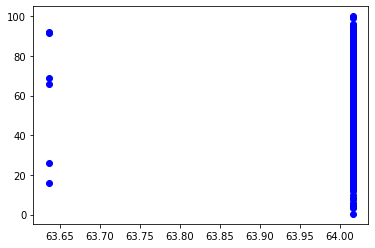

In [16]:
plt.plot(predictions_tahn2, test_y, "bo")
plt.show()